In [1]:
import pandas as pd
import numpy as np
import numpy.typing as npt
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.transform import Rotation

In [2]:
!pwd

/Users/mm/Desktop/Myolab


In [3]:
directory_path="/Users/mm/Desktop/Myolab/imu_fitness_basic"

Rotation matrix to Euler Angles

In [4]:
def rotation_matrices_to_eulers(data_path: str) -> npt.NDArray[np.float64]:
    imu_data = pd.read_csv(data_path)
    rotation_matrices=imu_data[rotation_matrix_labels].values.reshape(-1, 3, 3)
    eulers = Rotation.from_matrix(rotation_matrices).as_euler("xyz")
    imu_data.drop(rotation_matrix_labels, axis=1, inplace=True)
    imu_data["euler_X"] = eulers[:, 0]  
    imu_data["euler_Y"] = eulers[:, 1]  
    imu_data["euler_Z"] = eulers[:, 2]  
    return imu_data

In [5]:
rotation_matrix_labels = [
        "rotation_matrix_m11",
        "rotation_matrix_m12",
        "rotation_matrix_m13",
        "rotation_matrix_m21",
        "rotation_matrix_m22",
        "rotation_matrix_m23",
        "rotation_matrix_m31",
        "rotation_matrix_m32",
        "rotation_matrix_m33",
    ]

Data Preparation

In [6]:
csv_files = []
data_df=[]
for subdir, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(subdir, file)
            df = rotation_matrices_to_eulers(file_path) #with euler angles
            path_parts = subdir.split(os.sep)
            exercise_name = path_parts[-2].split("_")[0]
            df.insert(0, 'exercise', exercise_name) 
            
            if 'Unnamed: 0' in df.columns:
                df.drop('Unnamed: 0', axis=1, inplace=True)
                
            data_df.append(df)

In [7]:
data_df_f = pd.concat(data_df, ignore_index=True)

In [8]:
data_df_f.head()

exercise  rep_count_from_intermediate  rep_count_from_start  \
0  armraise                     0.464286              0.000000   
1  armraise                     0.481861              0.017575   
2  armraise                     0.499241              0.034955   
3  armraise                     0.516428              0.052142   
4  armraise                     0.533423              0.069137   

   ref_xy_rotation  time   euler_X   euler_Y   euler_Z  
0         5.247949  0.00 -0.099967 -1.120315 -2.915097  
1         5.247949  0.05 -0.103568 -1.109266 -2.913372  
2         5.247949  0.10 -0.110496 -1.085316 -2.904828  
3         5.247949  0.15 -0.112742 -1.060064 -2.899468  
4         5.247949  0.20 -0.112582 -1.031245 -2.894379

In [9]:
data_df_f.shape

(1188661, 8)

Column definitions:

rep_count_from_intermediate: is indexed to the point of maximum flexion.

rep_count_from_start: is indexed to the beginning of the recording.

ref_xy_rotation: Rotation in the XY plane of the reference orientation is measured in radians (simulating the xArbitraryZVertical reference in the Apple CoreMotion SDK).

time: elapsed time from the start of the recording

euler_X: euler angle => rotation around X-axis => side-to-side movements

euler_Y: euler angle => rotation around Y-axis => forward and backward movements

euler_Z: euler angle => rotation around Z-axis => turning or rotational movements

Check for Null Values 

In [10]:
data_df_f.isnull().sum() #no null/missing values

exercise                       0
rep_count_from_intermediate    0
rep_count_from_start           0
ref_xy_rotation                0
time                           0
euler_X                        0
euler_Y                        0
euler_Z                        0
dtype: int64

In [11]:
data_df_f.groupby('exercise')[['euler_X', 'euler_Y', 'euler_Z']].describe()

euler_X                                                    \
                   count      mean       std       min       25%       50%   
exercise                                                                     
armraise         95636.0  0.019026  0.556123 -1.489829 -0.381934 -0.004334   
bicepcurl       101264.0  0.179810  2.665557 -3.141542 -2.670204  2.131707   
birddog         371798.0 -0.087920  1.483861 -3.141471 -1.523346 -0.140833   
burpee          130381.0  0.005118  1.454541 -3.141486 -1.308849  0.009794   
crunch           60751.0 -0.061766  2.362474 -3.141582 -2.390700 -0.993165   
hammercurl      126062.0  0.020310  1.021236 -3.136962 -1.021678  0.147518   
overheadpress    86046.0 -0.000902  1.198694 -3.092240 -1.224879 -0.191357   
pushup           74306.0 -0.091993  1.783944 -3.139488 -1.743981 -1.177435   
tricepkickback   50757.0  0.054800  1.402903 -3.141306 -1.320085  0.439812   
vup              91660.0 -0.248408  1.946639 -3.141584 -2.087503 -0.557678   

                                     euler_Y            ...            \
                     75%       max     count      mean  ...       75%   
exercise                                                ...             
armraise        0.419016  1.531014   95636.0  0.033538  ...  0.393266   
bicepcurl       2.706266  3.141548  101264.0  0.002121  ...  0.379944   
birddog         1.444380  3.141444  371798.0  0.005480  ...  0.614544   
burpee          1.318237  3.141433  130381.0 -0.005918  ...  0.643142   
crunch          2.449371  3.141476   60751.0 -0.052722  ...  0.408713   
hammercurl      0.997519  3.124250  126062.0 -0.062174  ...  0.595436   
overheadpress   1.257855  3.127705   86046.0 -0.009559  ...  0.734520   
pushup          1.714021  3.141434   74306.0 -0.102745  ...  0.599161   
tricepkickback  1.354308  3.136182   50757.0 -0.079616  ...  0.677003   
vup             1.206771  3.141529   91660.0  0.021926  ...  0.497476   

                           euler_Z                                          \
                     max     count      mean       std       min       25%   
exercise                                                                     
armraise        1.503450   95636.0  0.074263  1.704864 -3.141479 -1.256380   
bicepcurl       1.348423  101264.0  0.080520  1.776477 -3.141523 -1.673538   
birddog         1.569995  371798.0 -0.053822  1.712157 -3.141580 -1.621198   
burpee          1.567975  130381.0  0.056427  1.732783 -3.141563 -1.503208   
crunch          1.565505   60751.0 -0.021356  1.808835 -3.141420 -1.634013   
hammercurl      1.567261  126062.0 -0.175725  1.831423 -3.141548 -1.784922   
overheadpress   1.570434   86046.0  0.097838  1.693211 -3.141472 -1.465846   
pushup          1.562274   74306.0 -0.091257  1.628164 -3.140021 -1.569006   
tricepkickback  1.559136   50757.0 -0.136910  1.692477 -3.140475 -1.669332   
vup             1.568696   91660.0  0.066459  1.739908 -3.141574 -1.436119   

                                              
                     50%       75%       max  
exercise                                      
armraise        0.034474  1.662800  3.141347  
bicepcurl       0.205930  1.550522  3.141578  
birddog        -0.188380  1.564154  3.141574  
burpee          0.076069  1.661319  3.141568  
crunch          0.148038  1.344628  3.141576  
hammercurl     -0.382798  1.495451  3.141528  
overheadpress   0.355949  1.694982  3.141511  
pushup         -0.890966  1.562207  3.141421  
tricepkickback -0.349770  1.461124  3.140779  
vup             0.027178  1.557324  3.141510  

[10 rows x 24 columns]

In [12]:
def calculate_outliers(group):
    # Calculate mean and std for each Euler angle
    mean_x = group['euler_X'].mean()
    std_x = group['euler_X'].std()
    mean_y = group['euler_Y'].mean()
    std_y = group['euler_Y'].std()
    mean_z = group['euler_Z'].mean()
    std_z = group['euler_Z'].std()

    # Calculate Z-scores
    group['z_score_x'] = (group['euler_X'] - mean_x) / std_x
    group['z_score_y'] = (group['euler_Y'] - mean_y) / std_y
    group['z_score_z'] = (group['euler_Z'] - mean_z) / std_z

    # Identify outliers
    group['outlier_x'] = np.abs(group['z_score_x']) > 3
    group['outlier_y'] = np.abs(group['z_score_y']) > 3
    group['outlier_z'] = np.abs(group['z_score_z']) > 3
    return group

In [13]:
outliers_df = data_df_f.groupby('exercise', group_keys=True).apply(calculate_outliers)

# Print outliers for each exercise for each axis
for exercise in outliers_df['exercise'].unique():
    exercise_data = outliers_df[outliers_df['exercise'] == exercise]
    print(f"\nExercise: {exercise}")
    print("X axis outliers:")
    print(exercise_data[exercise_data['outlier_x']])
    print("Y axis outliers:")
    print(exercise_data[exercise_data['outlier_y']])
    print("Z axis outliers:")
    print(exercise_data[exercise_data['outlier_z']])


Exercise: armraise
X axis outliers:
Empty DataFrame
Columns: [exercise, rep_count_from_intermediate, rep_count_from_start, ref_xy_rotation, time, euler_X, euler_Y, euler_Z, z_score_x, z_score_y, z_score_z, outlier_x, outlier_y, outlier_z]
Index: []
Y axis outliers:
Empty DataFrame
Columns: [exercise, rep_count_from_intermediate, rep_count_from_start, ref_xy_rotation, time, euler_X, euler_Y, euler_Z, z_score_x, z_score_y, z_score_z, outlier_x, outlier_y, outlier_z]
Index: []
Z axis outliers:
Empty DataFrame
Columns: [exercise, rep_count_from_intermediate, rep_count_from_start, ref_xy_rotation, time, euler_X, euler_Y, euler_Z, z_score_x, z_score_y, z_score_z, outlier_x, outlier_y, outlier_z]
Index: []

Exercise: bicepcurl
X axis outliers:
Empty DataFrame
Columns: [exercise, rep_count_from_intermediate, rep_count_from_start, ref_xy_rotation, time, euler_X, euler_Y, euler_Z, z_score_x, z_score_y, z_score_z, outlier_x, outlier_y, outlier_z]
Index: []
Y axis outliers:
Empty DataFrame
Column

Hammercurl exercise has outliers in the euler_X, let's cross verify whether these are outliers or expected value's for certain movements.

Euler angle's typically range from -pi to pi. euler_X is nearing -pi and Hammer curl doesn't require a full rotational back and forth(cos of X-axis), so these might be due to the "gimbal lock" or "Wrap-arounds" and we have to handle these angles

In [14]:
hammercurl_df = data_df_f[data_df_f['exercise'] == 'hammercurl'].copy()

In [15]:
hammercurl_df['z_score_x'] = (hammercurl_df['euler_X'] - hammercurl_df['euler_X'].mean()) / hammercurl_df['euler_X'].std()

hammercurl_df.loc[hammercurl_df['z_score_x'].abs() > 3, 'euler_X'] = np.sin(hammercurl_df['euler_X'])

In [16]:
hammercurl_df=hammercurl_df.drop("z_score_x",axis=1)

In [17]:
hammercurl_df

exercise  rep_count_from_intermediate  rep_count_from_start  \
333703  hammercurl                     0.480000              0.000000   
333704  hammercurl                     0.499452              0.019452   
333705  hammercurl                     0.518951              0.038951   
333706  hammercurl                     0.538499              0.058499   
333707  hammercurl                     0.558095              0.078095   
...            ...                          ...                   ...   
459760  hammercurl                     9.299744              8.841410   
459761  hammercurl                     9.323902              8.865569   
459762  hammercurl                     9.348559              8.890226   
459763  hammercurl                     9.373682              8.915349   
459764  hammercurl                     9.399239              8.940905   

        ref_xy_rotation   time   euler_X   euler_Y   euler_Z  
333703         1.247535   0.00  1.326458  0.681773 -1.843610  
333704         1.247535   0.05  1.327602  0.691314 -1.838727  
333705         1.247535   0.10  1.331356  0.699922 -1.834948  
333706         1.247535   0.15  1.336036  0.709164 -1.833622  
333707         1.247535   0.20  1.340016  0.718921 -1.834722  
...                 ...    ...       ...       ...       ...  
459760         0.640304  19.70 -1.253599 -0.491865  1.400673  
459761         0.640304  19.75 -1.262726 -0.489188  1.383514  
459762         0.640304  19.80 -1.270517 -0.488536  1.373285  
459763         0.640304  19.85 -1.277118 -0.489460  1.365254  
459764         0.640304  19.90 -1.283201 -0.492123  1.356462  

[126062 rows x 8 columns]

In [18]:
mask = data_df_f['exercise'] == 'hammercurl'
data_df_f.loc[mask, :] = hammercurl_df.values

In [19]:
data_df_f[data_df_f['exercise'] == 'hammercurl']

exercise  rep_count_from_intermediate  rep_count_from_start  \
333703  hammercurl                     0.480000              0.000000   
333704  hammercurl                     0.499452              0.019452   
333705  hammercurl                     0.518951              0.038951   
333706  hammercurl                     0.538499              0.058499   
333707  hammercurl                     0.558095              0.078095   
...            ...                          ...                   ...   
459760  hammercurl                     9.299744              8.841410   
459761  hammercurl                     9.323902              8.865569   
459762  hammercurl                     9.348559              8.890226   
459763  hammercurl                     9.373682              8.915349   
459764  hammercurl                     9.399239              8.940905   

        ref_xy_rotation   time   euler_X   euler_Y   euler_Z  
333703         1.247535   0.00  1.326458  0.681773 -1.843610  
333704         1.247535   0.05  1.327602  0.691314 -1.838727  
333705         1.247535   0.10  1.331356  0.699922 -1.834948  
333706         1.247535   0.15  1.336036  0.709164 -1.833622  
333707         1.247535   0.20  1.340016  0.718921 -1.834722  
...                 ...    ...       ...       ...       ...  
459760         0.640304  19.70 -1.253599 -0.491865  1.400673  
459761         0.640304  19.75 -1.262726 -0.489188  1.383514  
459762         0.640304  19.80 -1.270517 -0.488536  1.373285  
459763         0.640304  19.85 -1.277118 -0.489460  1.365254  
459764         0.640304  19.90 -1.283201 -0.492123  1.356462  

[126062 rows x 8 columns]

In [20]:
exercises = data_df_f['exercise'].unique()

Feature Correlations

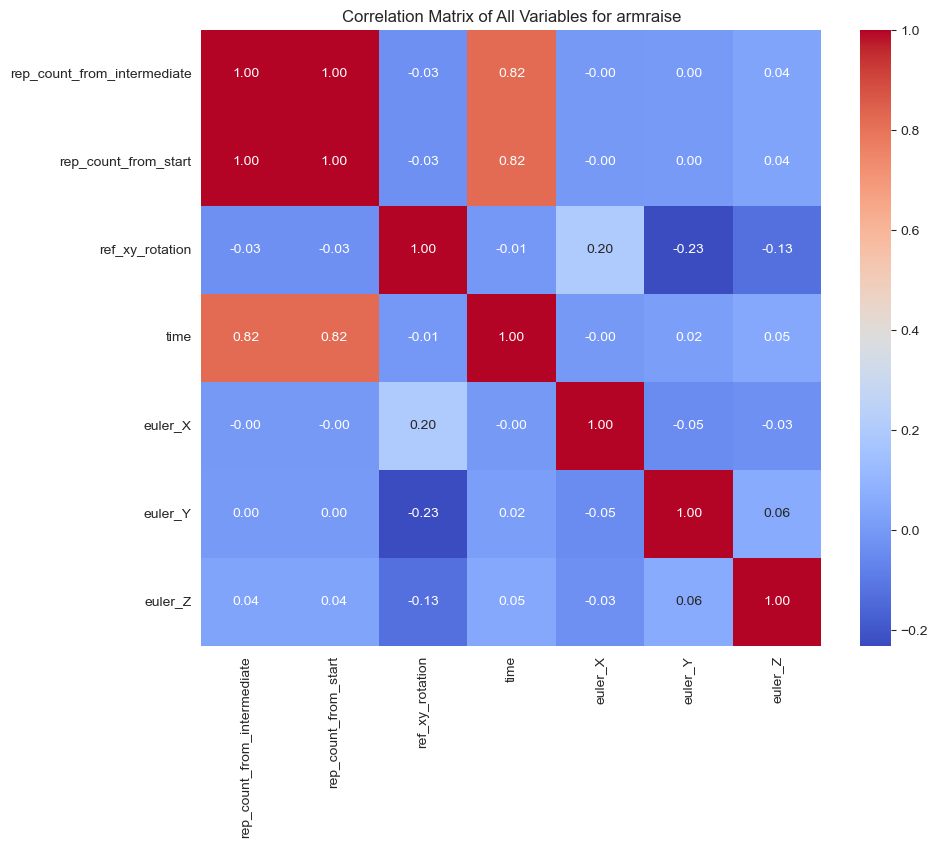

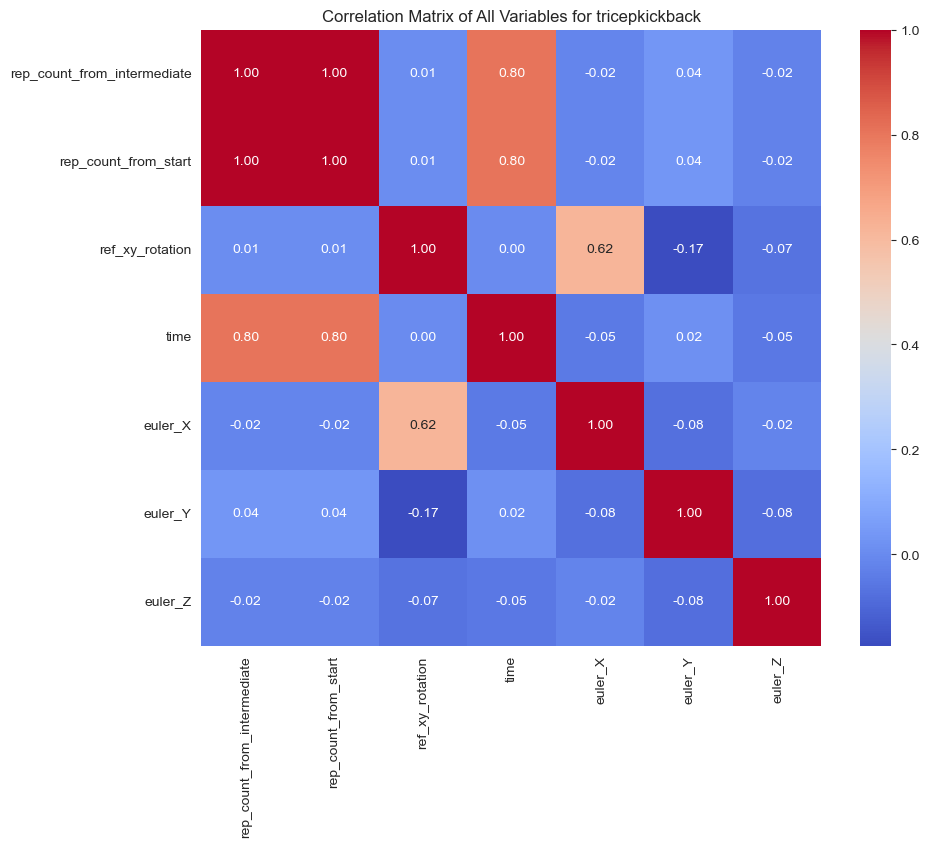

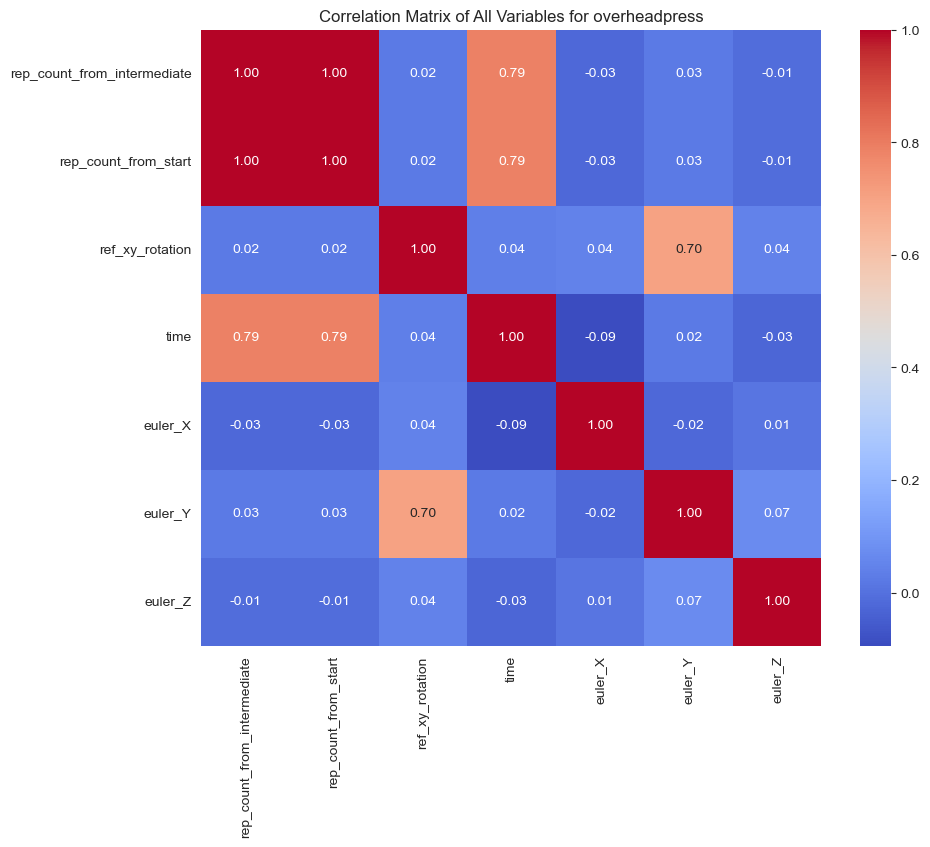

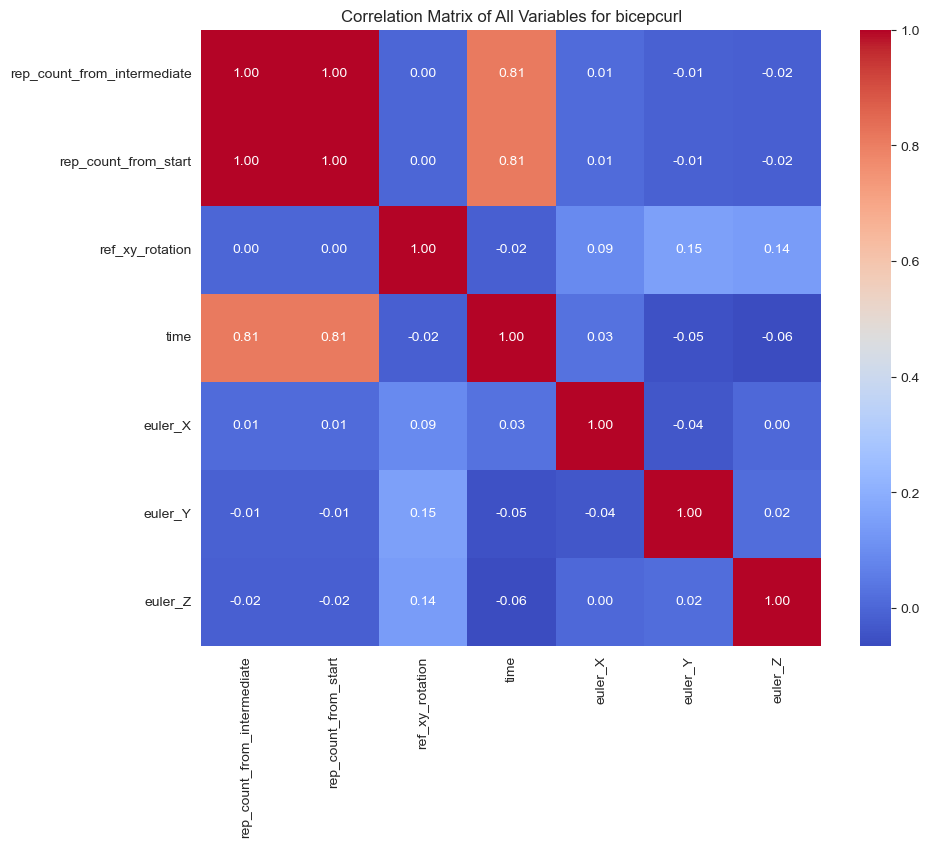

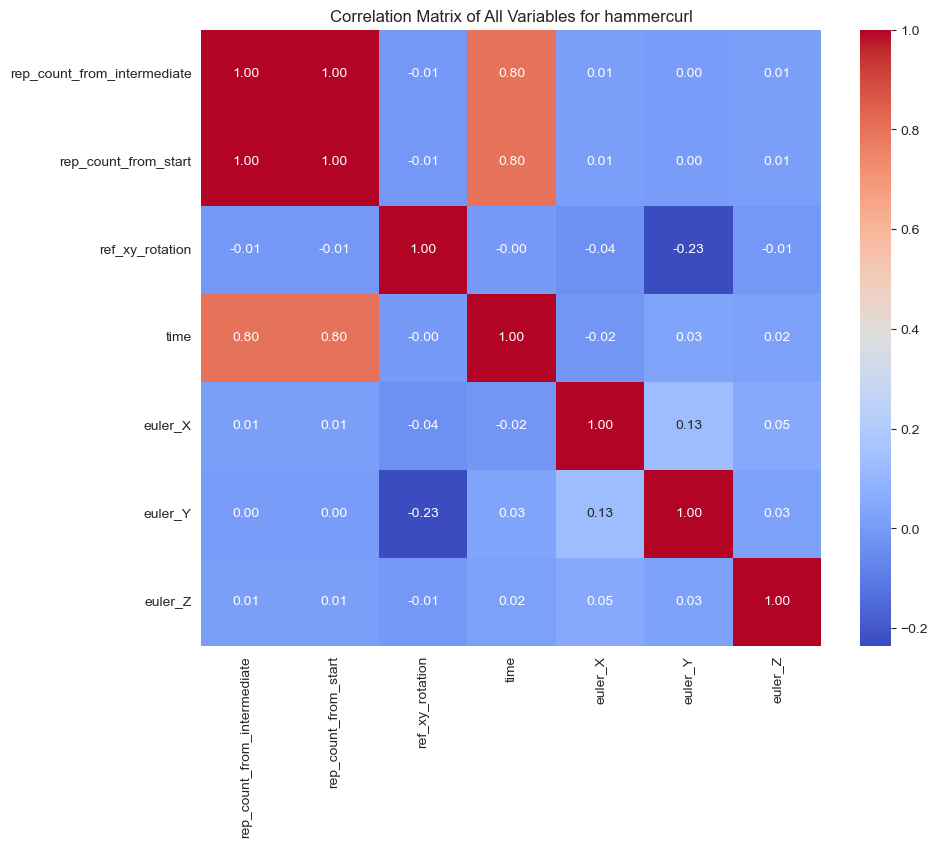

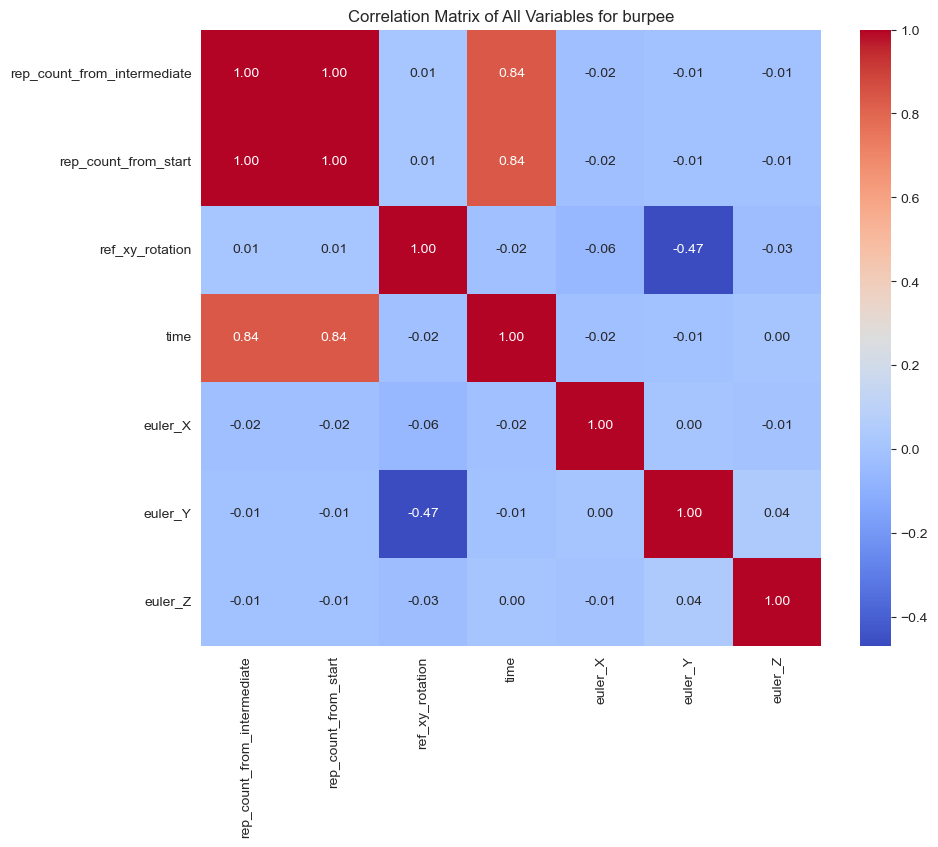

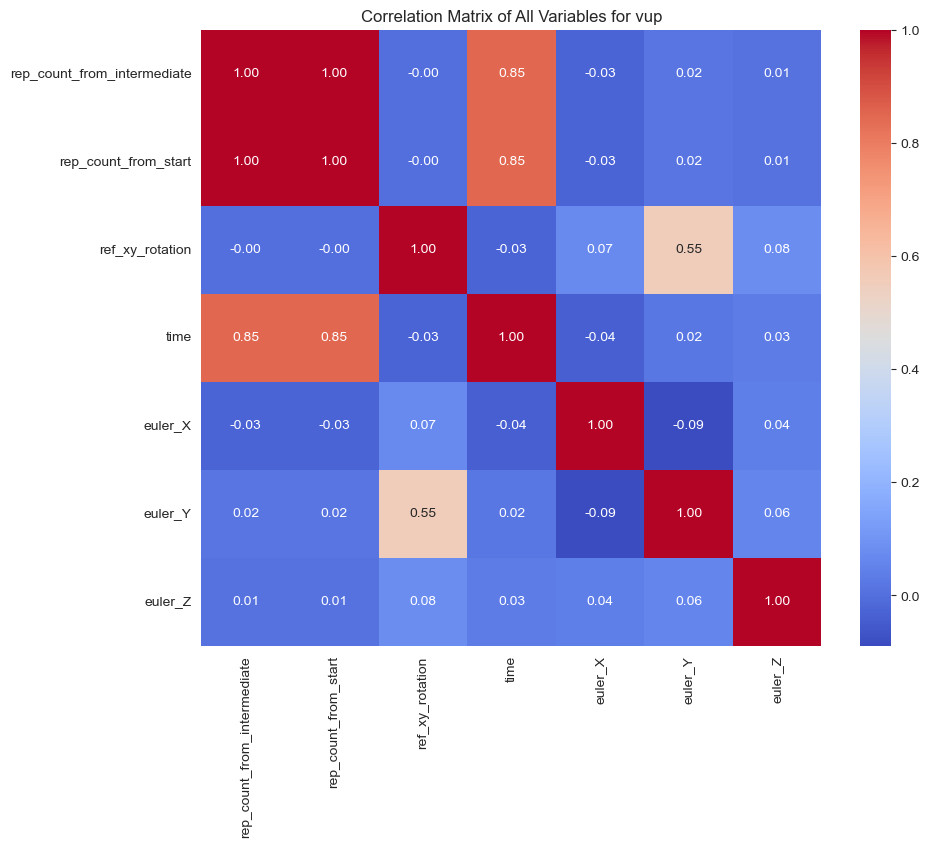

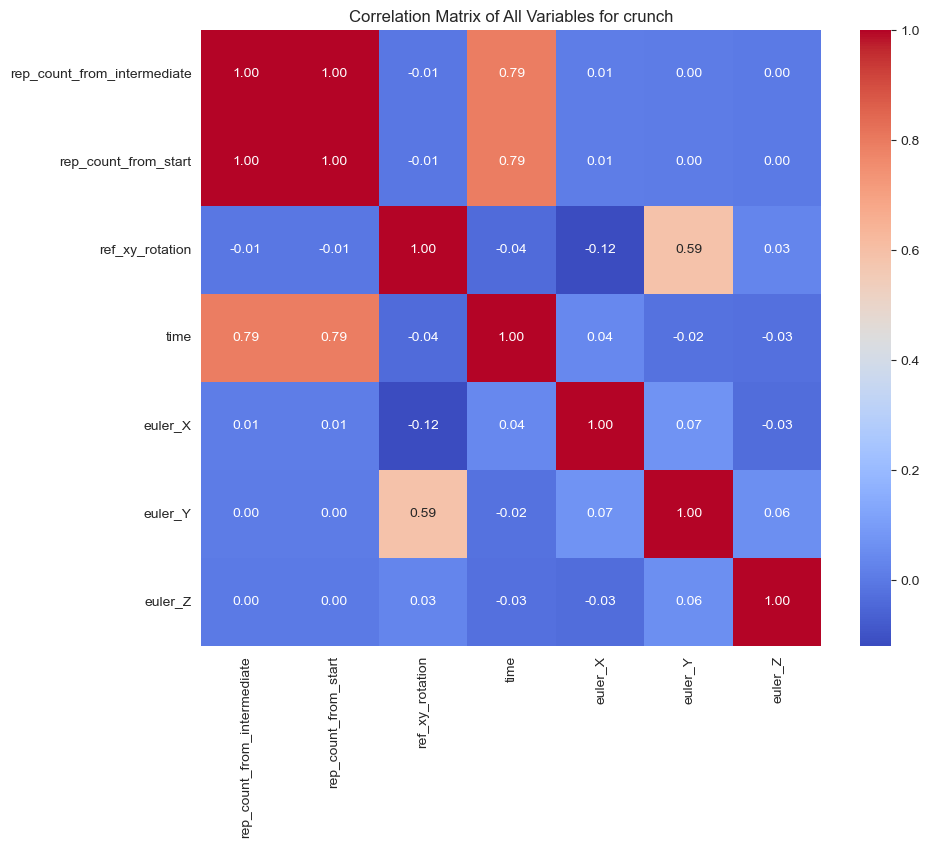

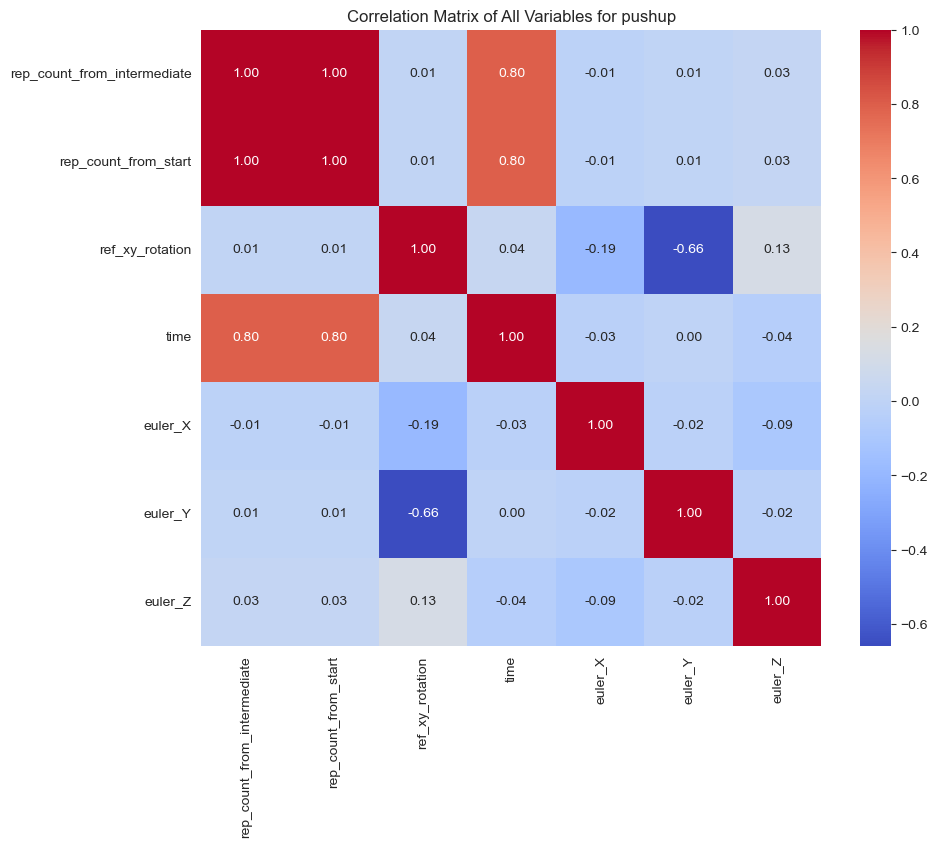

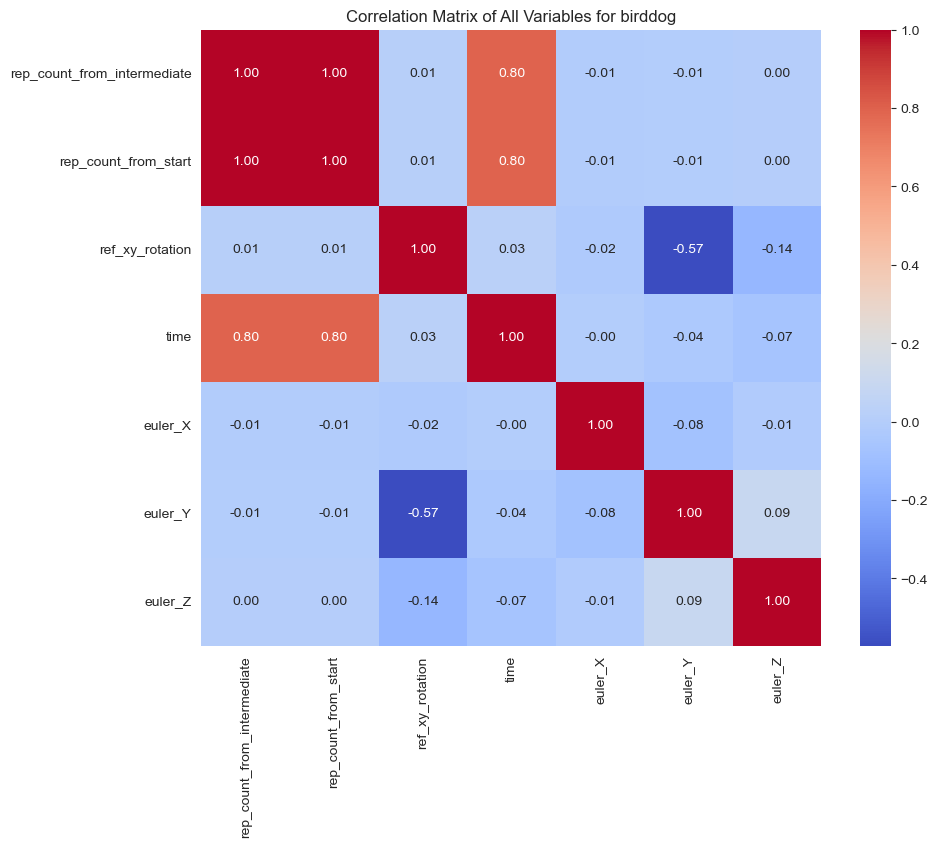

In [21]:
for exercise in exercises:
    # Filter data for the current exercise
    exercise_df = data_df_f[data_df_f['exercise'] == exercise]
    
    # Compute the correlation matrix, explicitly considering only numeric columns
    correlation_matrix = exercise_df.corr(numeric_only=True)
    
    # Plotting the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix of All Variables for {exercise}')
    plt.show()

General insights into correlated features:
"rep_count_from_intermediate" and "rep_count_from_start" are highly correlated indicating the counters are synchronised and hence might be redundant considering both for modelling?

euler_x,euler_y and euler_z seem to be less dependent on each other across exercises.

Armraise:
'ref_xy_rotation' & 'euler_X', 'euler_Z' and 'time' are positively correlated features. Implies focussing on "euler_Z" for armraise exercise.

Tricep Kickback:
Strong correlation between 'euler_X' and 'ref_xy_rotation', suggesting that movements around the Y-axis are closely tied to changes in the XY plane rotation.

OverheadPress:
Strong correlation between 'euler_Y' and 'ref_xy_rotation'.

BicepCurl:
positive correlation between 'euler_X' and 'ref_xy_rotation' and 'euler_Y' and 'ref_xy_rotation'. But all in all very less correlation across all the features.

HammerCurl:
Positive slight correlation between 'euler_X' and 'euler_Y'.

Burpee:
Moderate negative correlation exists between 'euler_Y' and 'ref_xy_rotation'

V-UP:
ref_xy_rotation shows a moderate positive correlation with euler_Y (0.55)

Crunch:
ref_xy_rotation shows a notable correlation with euler_Y
euler_Y is slightly correlated with 'time' and 'euler_Z'

Pushup:
ref_xy_rotation has a notable negative correlation with euler_Y (-0.66)
euler_Y shows a strong negative correlation with euler_Z (-0.66)

Bird Dog:
ref_xy_rotation shows a moderate negative correlation with euler_Y (-0.57)
euler_Y and euler_Z exhibit a mild negative correlation (-0.14)

Euler Angle Visualisation [Variance, Rate of change w.r.t time]

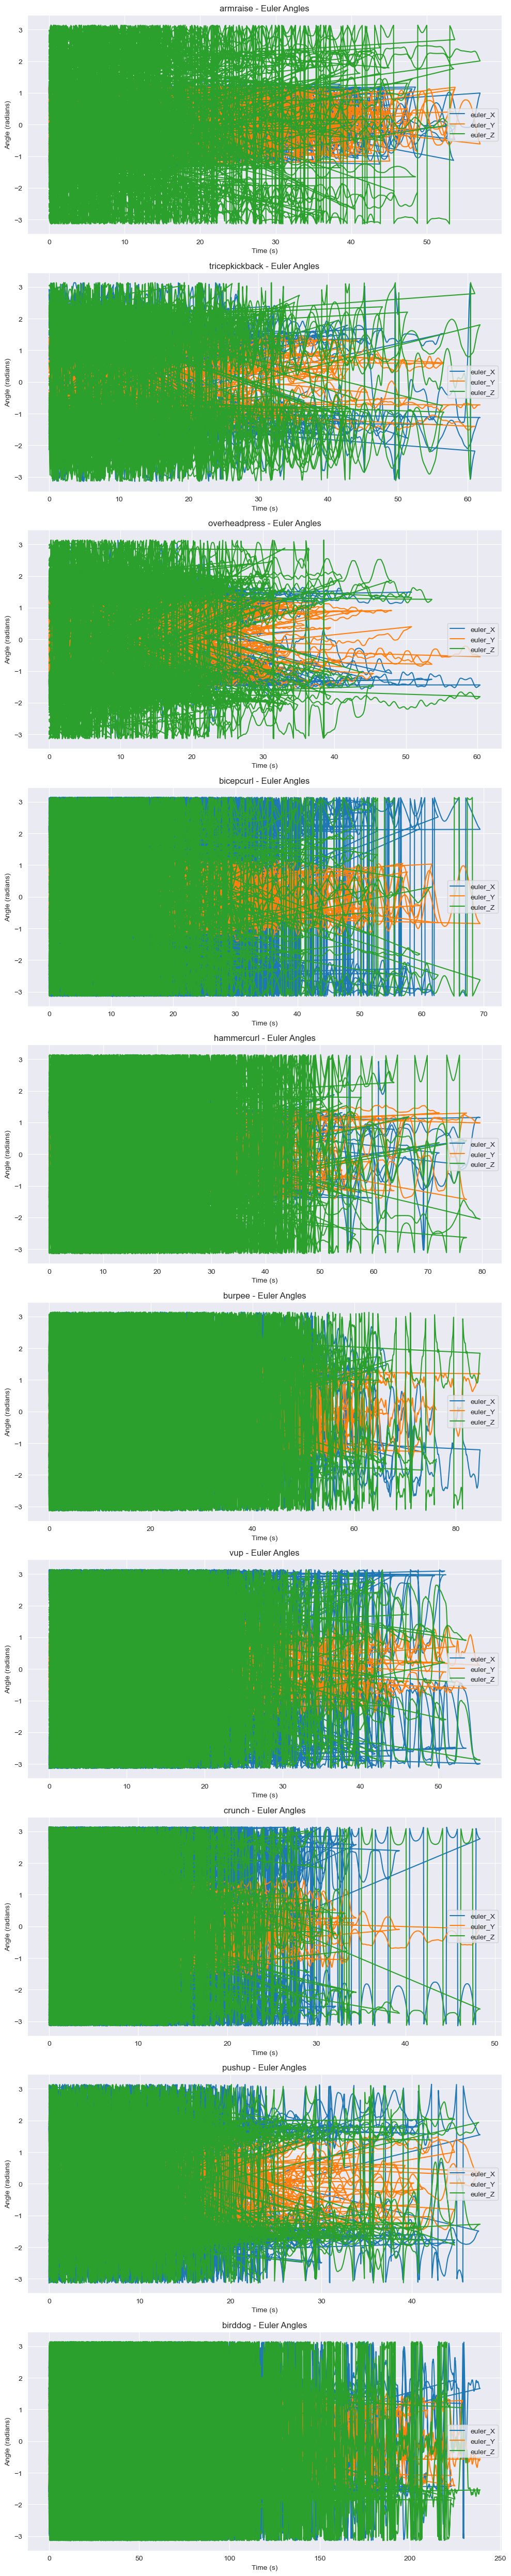

In [22]:
fig, axes = plt.subplots(len(exercises), 1, figsize=(10, 5 * len(exercises)), squeeze=False)

for i, exercise in enumerate(exercises):
    ax = axes[i, 0]
    for angle in ['euler_X', 'euler_Y', 'euler_Z']:
        ax.plot(data_df_f[data_df_f['exercise'] == exercise]['time'], data_df_f[data_df_f['exercise'] == exercise][angle], label=angle)
    
    ax.set_title(f"{exercise} - Euler Angles")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Angle (radians)')
    ax.legend(loc="center right")

plt.tight_layout()
plt.show()

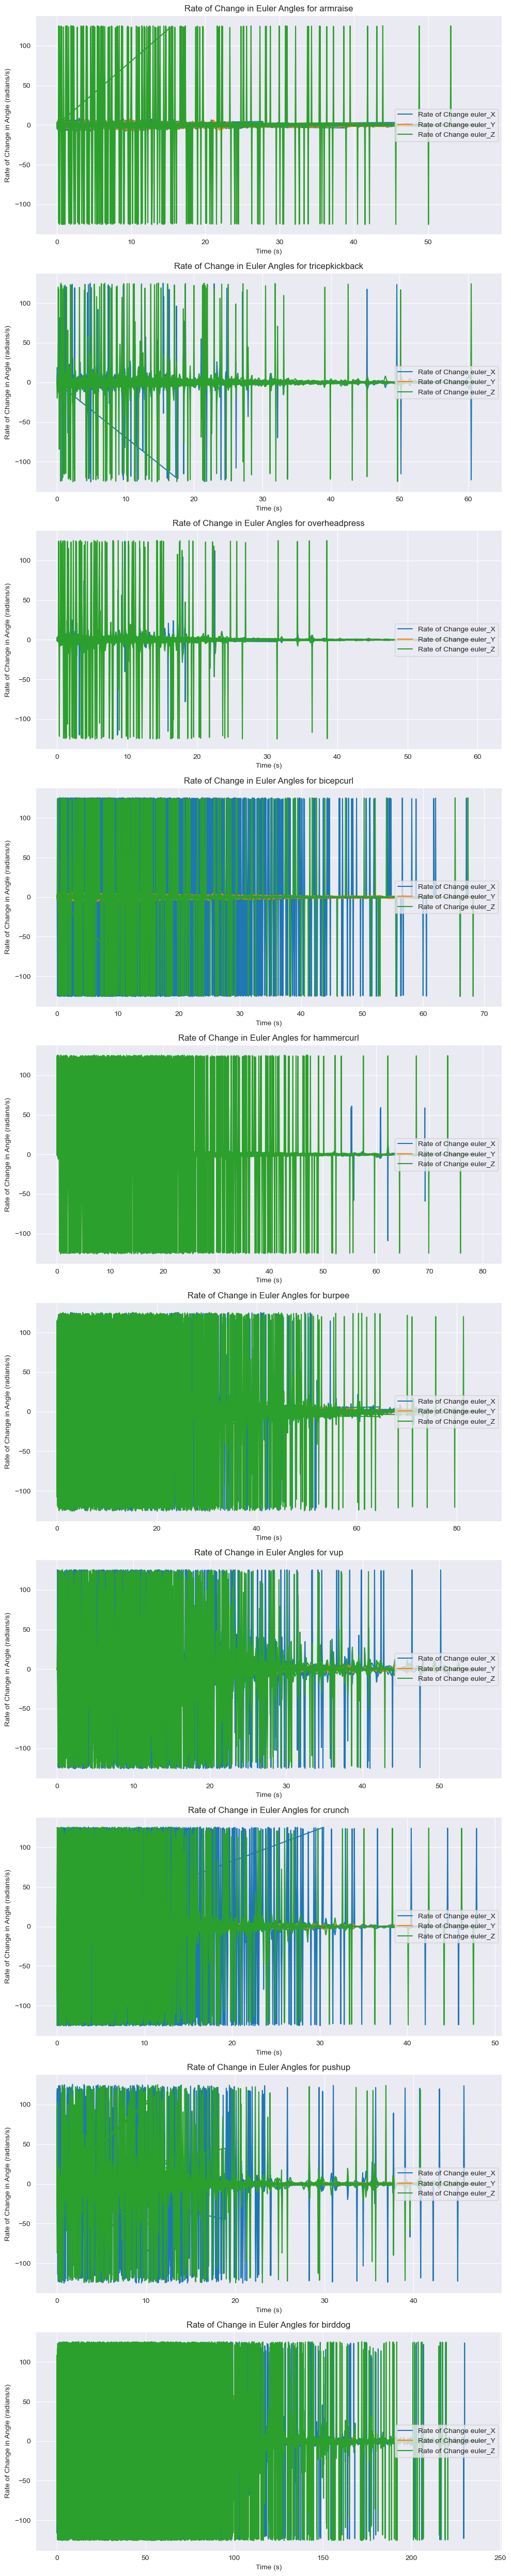

In [23]:
exercises = data_df_f['exercise'].unique()

fig, axes = plt.subplots(len(exercises), 1, figsize=(10, 5 * len(exercises)), squeeze=False)

for i, exercise in enumerate(exercises):
    ax = axes[i, 0]
    exercise_df = data_df_f[data_df_f['exercise'] == exercise]
    for angle in ['euler_X', 'euler_Y', 'euler_Z']:
        rate_of_change = exercise_df[angle].diff() / exercise_df['time'].diff()
        ax.plot(exercise_df['time'].iloc[1:], rate_of_change.iloc[1:], label=f'Rate of Change {angle}')
    
    ax.set_title(f"Rate of Change in Euler Angles for {exercise}")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Rate of Change in Angle (radians/s)')
    ax.legend(loc="center right")

plt.tight_layout()
plt.show()

1. Armraise
Euler Angles: The angles show cyclical variations suggesting repetitive upward and downward arm movements.
Rate of Change: Peaks in the rate of change correspond to moments where the arm changes direction from up to down or vice versa, indicating rapid movements at these points.
2. Tricep Kickback
Euler Angles: Shows consistent movement patterns, likely indicating a bending and extending motion at the elbow.
Rate of Change: Sharp changes are visible at the start and end of movements, typical for exercises involving distinct phases like extension and retraction.
3. Overhead Press
Euler Angles: Steady increase and decrease patterns, reflective of lifting weights overhead and then lowering them.
Rate of Change: The rate changes more dramatically as the weights reach the peak and return to the starting position, emphasizing the exertion and controlled return.
4. Bicep Curl
Euler Angles: Displays regular, smooth cycles indicative of curling and uncurling actions typical in bicep curls.
Rate of Change: Fluctuations in the rate of change mirror the contraction and relaxation phases of the biceps.
5. Hammer Curl
Euler Angles: Similar to bicep curls but with less range, suggesting a tighter curl possibly with weights.
Rate of Change: Sharp increases and decreases at the beginning and end of each curl indicate quick changes in movement direction.
6. Burpee
Euler Angles: Large variations might reflect the complex movements involved in a burpee including jumps, squats, and plank positions.
Rate of Change: High peaks correspond to transitions between these positions, showcasing rapid whole-body movements.
7. V-up
Euler Angles: Smaller, consistent oscillations likely indicate controlled leg and upper body raises.
Rate of Change: More gradual changes suggest a more consistent speed throughout the exercise compared to others.
8. Crunch
Euler Angles: Minor fluctuations in angles indicating focused abdominal contractions.
Rate of Change: Low rates of change reflect the controlled nature of the crunch exercise focusing on core stability.
9. Pushup
Euler Angles: Significant variations might be showing the up-and-down motion during pushups.
Rate of Change: Rapid changes at the lowest and highest points of the pushup indicate quick reversals in direction.
10. Birddog
Euler Angles: Mild variations since this exercise involves controlled, balanced extensions of opposite limbs.
Rate of Change: Low and steady, corresponding to the controlled movement required to maintain balance.

Conclusion:
The plots of Euler angles and their rates of change provide insights into the nature of movements involved in each exercise. Faster rates of change are generally associated with more dynamic, explosive movements or transitions between exercise phases, while steady or low rates suggest controlled, sustained movements. Each exercise's unique pattern can help in understanding the required muscle engagements and possibly in refining technique or assessing performance consistency.

In [25]:
data_df_f.to_csv('prepared_data.csv', index=False)

Data Analysis with Rotational Matrices

Check for Outliers at each exercise level:
 
In this context, outliers mean an abnormal posture or movements with respect to that particular exercise. Need to identify them to ensure proper classification.

1. Based on a cursory reading, I understand that rotational matrices in general are orthogonal and have determinant close to 1 or exactly 1, so I plan on checking for any deviations with respect to this property.

In [24]:
#matrix operations
def calculate_determinant(row):
    matrix = row.values.reshape(3, 3)
    return np.linalg.det(matrix)

def frobenius_norm(row):
    matrix = row.values.reshape(3, 3) # Reshape the row to form a 3x3 matrix
    return np.linalg.norm(matrix, 'fro') # Frobenius norm

In [25]:
data_df_f['determinant'] = data_df_f[rotation_matrix_labels ].apply(calculate_determinant, axis=1)
outliers = data_df_f[np.abs(data_df_f['determinant'] - 1) > 0.05] #deviation from determinant 1

print("Detected outliers: ", outliers.shape)
print(outliers)

KeyError: "None of [Index(['rotation_matrix_m11', 'rotation_matrix_m12', 'rotation_matrix_m13',\n       'rotation_matrix_m21', 'rotation_matrix_m22', 'rotation_matrix_m23',\n       'rotation_matrix_m31', 'rotation_matrix_m32', 'rotation_matrix_m33'],\n      dtype='object')] are in the [columns]"

No deviations with respect to the orthogonal nature of the rotational matrices. Next check,

2. To ensure consistency and correctness per exercise, we can check the outliers using frobenius norm where we compare each rotational matrix with an average rotational matrix to identify the deviation. 
 Large Norm values => Incorrect form or Erratic movements
 
 Ideally we need small and consistent norm values to ensure consistency and alignment in the movements for the exercise.

In [ ]:
data_df_f['frobenius_norm'] = data_df_f[rotation_matrix_labels].apply(frobenius_norm, axis=1)
grouped_norms = data_df_f.groupby('exercise')['frobenius_norm'].describe()

In [ ]:
grouped_norms

The standard deviation is very minimal, the norm values consistent through exercises

Feature Engineering

In [ ]:
data_df_f=data_df_f.drop(['determinant','frobenius_norm'],axis=1)

In [ ]:
grouped = data_df_f.groupby('exercise')
for name, group in grouped:
    axes = group.hist(bins=15, figsize=(15, 10), layout=(4, 4))
    fig = plt.gcf()
    fig.suptitle(f'Histograms of Rotation Angles and Other Features for {name}')
    plt.show()

In [ ]:
corr = data_df_f.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
